<a href="https://colab.research.google.com/github/Maradonas/Pos-Tech-FIAP/blob/main/TechChallenger1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [140]:
# 1. Carregar os dados
url = "https://raw.githubusercontent.com/Maradonas/FIAP-TECH-CHALLENGER-1/5a4562c20ce54ff54f8b5da2b723b2c5ae904cb2/ExpVinho.csv"
df = pd.read_csv(url, encoding='UTF-8', sep='\t')


In [141]:
# Primeiro, vamos separar as colunas de quantidade e valor
quant_cols = [col for col in df.columns if '.1' not in str(col) and col not in ['Id', 'País']]
valor_cols = [col for col in df.columns if '.1' in str(col)]

In [142]:
# Criar dois dataframes separados
df_quant = df.melt(id_vars=['Id', 'País'],
                   value_vars=quant_cols,
                   var_name='Ano',
                   value_name='Quantidade')

df_valor = df.melt(id_vars=['Id', 'País'],
                   value_vars=valor_cols,
                   var_name='Ano',
                   value_name='Valor')

In [143]:
# Limpar os nomes dos anos (remover .1)
df_valor['Ano'] = df_valor['Ano'].str.replace('.1', '')

In [144]:
# Juntar os dois dataframes
df_final = pd.merge(df_quant, df_valor, on=['Id', 'País', 'Ano'])

In [145]:
#Adiciona o Brasil como pais de origem
df_final['Pais_Origem'] = 'Brasil'

In [146]:
df_final['Ano'] = df_final['Ano'].astype(int)

In [147]:
# Filtrar os anos desejados
df_final = df_final[(df_final['Ano'] >= 2009) & (df_final['Ano'] <= 2024)]

In [148]:
df_final.rename(columns={'País': 'Pais_Destino'},inplace=True)

In [149]:
# Antes de calcular Valor_litro, tratar quantidade zero
df_final['Quantidade'] = df_final['Quantidade'].replace(0, np.nan)  # ou um valor pequeno como 0.0001


In [150]:
df_final['Valor_litro'] = df_final['Valor'] / df_final['Quantidade']

In [151]:
df_final

,Id,Pais_Destino,Ano,Quantidade,Valor,Pais_Origem,Valor_litro
5499,1,Afeganistão,2009,NaN,0,Brasil,NaN
5500,2,África do Sul,2009,NaN,0,Brasil,NaN
5501,3,"Alemanha, República Democrática",2009,225086.0,393482,Brasil,1.748141
5502,4,Angola,2009,54786.0,84235,Brasil,1.537528
5503,5,Anguilla,2009,NaN,0,Brasil,NaN
...,...,...,...,...,...,...,...
7750,137,Tuvalu,2024,NaN,0,Brasil,NaN
7751,138,Uruguai,2024,36729.0,62325,Brasil,1.696888
7752,139,Vanuatu,2024,NaN,0,Brasil,NaN
7753,140,Venezuela,2024,122922.0,199418,Brasil,1.622313


In [152]:
df_rank_valor      = df_final.groupby(['Pais_Origem', 'Pais_Destino'])['Valor'].sum().reset_index()
df_rank_quantidade = df_final.groupby(['Pais_Origem', 'Pais_Destino'])['Quantidade'].sum().reset_index()
df_rank_litro      = df_final.groupby('Pais_Destino')['Valor_litro'].mean().reset_index()

In [153]:
df_rank_quantidade.sort_values(by='Quantidade', ascending=False, inplace=True)
df_rank_valor.sort_values(by='Valor', ascending=False, inplace=True)
df_rank_litro.sort_values('Valor_litro', ascending=False,inplace=True)

In [154]:
display(df_rank_valor)
display(df_rank_quantidade)
display(df_rank_litro)

,Pais_Origem,Pais_Destino,Valor
102,Brasil,Paraguai,47984063
112,Brasil,Rússia,23152054
50,Brasil,Estados Unidos,9957775
29,Brasil,China,5086290
110,Brasil,Reino Unido,4747648
...,...,...,...
93,Brasil,Namíbia,0
107,Brasil,Porto Rico,0
113,Brasil,Senegal,0
111,Brasil,República Dominicana,0


,Pais_Origem,Pais_Destino,Quantidade
102,Brasil,Paraguai,34508515.0
112,Brasil,Rússia,32822197.0
50,Brasil,Estados Unidos,3659709.0
65,Brasil,Haiti,2801918.0
29,Brasil,China,2608917.0
...,...,...,...
93,Brasil,Namíbia,0.0
107,Brasil,Porto Rico,0.0
113,Brasil,Senegal,0.0
111,Brasil,República Dominicana,0.0


,Pais_Destino,Valor_litro
139,Áustria,21.533333
7,Argélia,14.500000
126,Tanzânia,11.666667
12,Bangladesh,10.555556
20,Bulgária,9.972650
...,...,...
93,Namíbia,NaN
107,Porto Rico,NaN
111,República Dominicana,NaN
113,Senegal,NaN


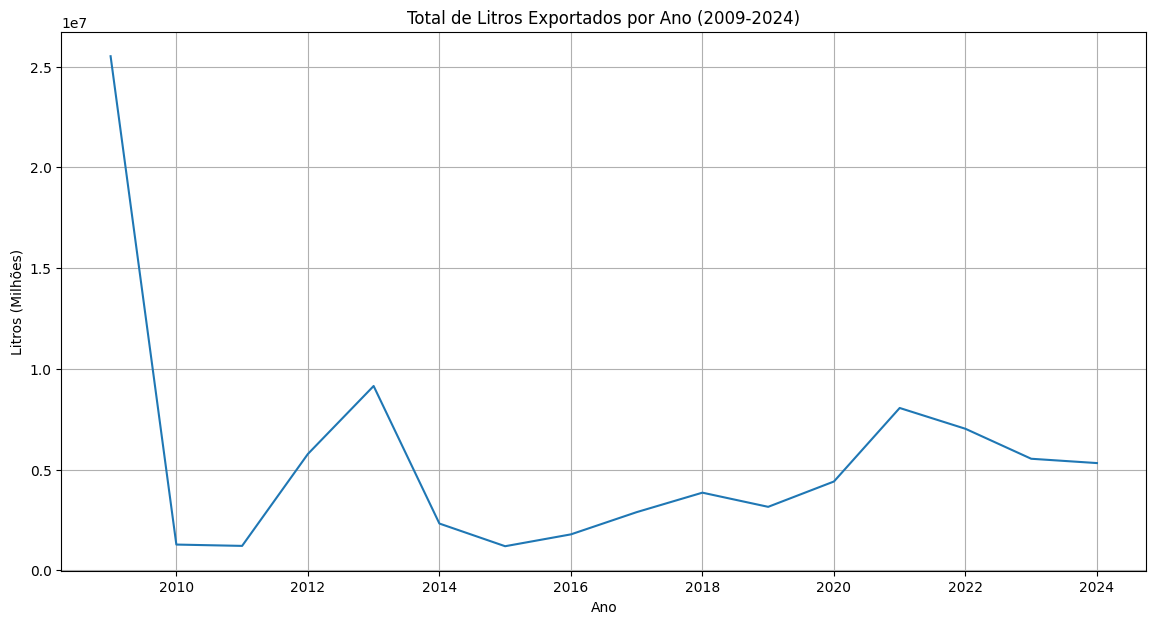

In [166]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_final, x='Ano', y='Quantidade', estimator='sum', errorbar=None)
plt.title('Total de Litros Exportados por Ano (2009-2024)')
plt.ylabel('Litros (Milhões)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

<ipython-input-167-1f91974df5ca>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




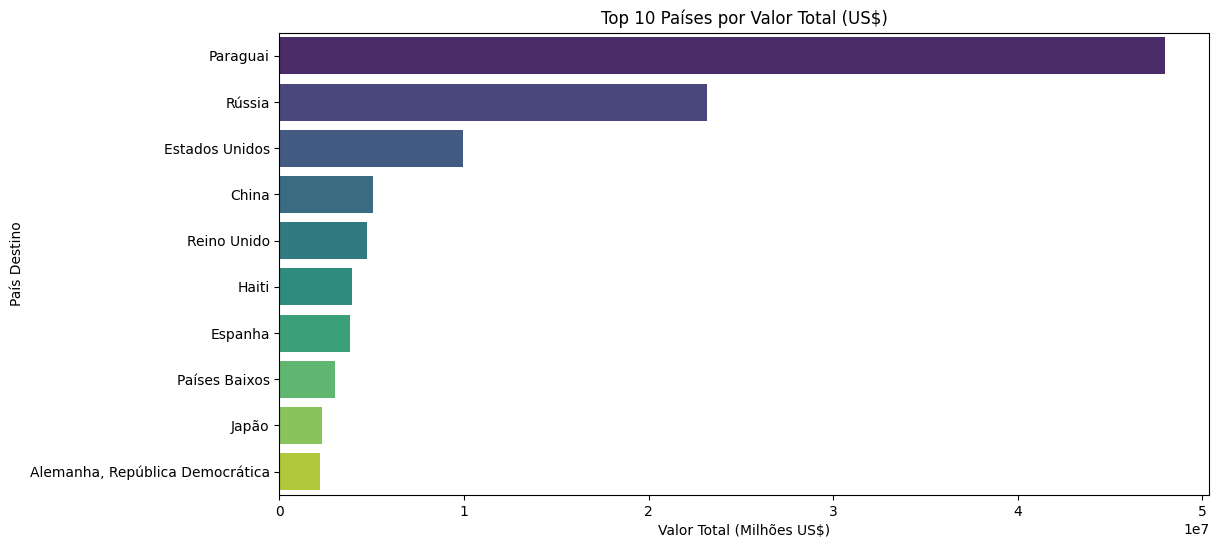

In [167]:
top_10_valor = df_rank_valor.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_valor, x='Valor', y='Pais_Destino', palette='viridis')
plt.title('Top 10 Países por Valor Total (US$)')
plt.xlabel('Valor Total (Milhões US$)')
plt.ylabel('País Destino')
plt.show()